# Data Science CoderHouse [61750]

### Alumno: [Facundo Rodríguez]

## Introducción

La rotación de empleados (*Attrition*) es un desafío clave en la gestión de recursos humanos, ya que la pérdida de talento puede generar costos elevados para una empresa, afectar la moral del equipo y disminuir la productividad. Comprender los factores que influyen en la decisión de un empleado de abandonar la organización es crucial para desarrollar estrategias de retención efectivas.

En este análisis, utilizaremos un dataset de recursos humanos que contiene información sobre empleados, incluyendo edad, salario, distancia al trabajo, satisfacción laboral, equilibrio entre vida y trabajo, y otros factores que podrían estar relacionados con la rotación. A través de técnicas de análisis exploratorio de datos (EDA) y modelado predictivo, intentaremos responder preguntas como:

- ¿Cuáles son los principales factores que influyen en la rotación de empleados?
- ¿Existe una relación entre la satisfacción laboral (`JobSatisfaction`) y la probabilidad de que un empleado renuncie (`Attrition`)?
- ¿El equilibrio entre trabajo y vida personal (`WorkLifeBalance`) impacta en la permanencia dentro de la empresa?
- ¿Los empleados que viven más lejos de la oficina (`DistanceFromHome`) tienen mayor tendencia a abandonar la organización?

Este estudio permitirá identificar patrones y tendencias que pueden ayudar a la empresa a tomar decisiones basadas en datos para reducir la rotación y mejorar la retención del talento.


## Descripción del Problema

El análisis de la rotación de empleados (*Attrition*) es un tema crítico en la gestión de recursos humanos. La salida frecuente de empleados de una empresa puede generar altos costos de contratación, pérdida de conocimiento organizacional y reducción de la productividad. Identificar los factores que influyen en la decisión de un empleado de abandonar su puesto es fundamental para mejorar la retención de talento y optimizar estrategias de gestión del personal.

Este estudio busca analizar diversas variables que podrían estar relacionadas con la rotación de empleados, como la satisfacción laboral (`JobSatisfaction`), la distancia al trabajo (`DistanceFromHome`), el equilibrio entre trabajo y vida personal (`WorkLifeBalance`), entre otras. Mediante un enfoque basado en datos, se pretende identificar patrones y tendencias que puedan ayudar a predecir y mitigar la rotación.

## Objetivo

El objetivo principal de este análisis es explorar y modelar la relación entre diferentes características de los empleados y la probabilidad de que abandonen la empresa. Específicamente, buscamos:

- Identificar los factores más relevantes que influyen en la rotación de empleados (`Attrition`).
- Analizar si existen patrones en variables clave como satisfacción laboral, distancia al trabajo y equilibrio entre trabajo y vida personal.
- Proporcionar insights accionables para mejorar la retención del talento en la organización.

## Fuente

Los datos utilizados en este análisis provienen del dataset **IBM HR Analytics Employee Attrition & Performance**, disponible en Kaggle:

🔗 [IBM HR Analytics Employee Attrition & Performance | Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)


## Importación de Librerías y Carga de Datos


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import skew
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from datetime import datetime

In [23]:
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
def download_and_read_csv_from_google_drive(file_id):
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    csv_path = "./data.csv"

    # Descargar el archivo directamente usando gdown
    gdown.download(url, csv_path, quiet=False)

    # Leer el CSV descargado
    df = pd.read_csv(csv_path)
    return df

In [11]:
# ID del archivo de Google Drive
file_id = "1E4-CzDDjulUhaT05NKt8NP0tHF6YETX0"

In [12]:
df = download_and_read_csv_from_google_drive(file_id)

Downloading...
From: https://drive.google.com/uc?export=download&id=1E4-CzDDjulUhaT05NKt8NP0tHF6YETX0
To: /content/data.csv
100%|██████████| 228k/228k [00:00<00:00, 63.4MB/s]


## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [14]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [16]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### 1. **Cantidad de registros**
- El dataset contiene un total de **1470 registros**, lo que representa un tamaño manejable para realizar análisis exploratorios y construir modelos predictivos.

#### 2. **Tipos de datos**
- **Numéricos**:
  - 26 columnas de tipo numérico (`int64` o `float64`), incluyendo ejemplos como `Age`, `DailyRate`, `DistanceFromHome`, `Education` y `EmployeeCount`.

- **Categóricos**:
  - 9 columnas de tipo categórico (`object`), como `Attrition`, `BusinessTravel`, `Department`, `EducationField` y `Gender`.

#### 3. **Valores nulos**
- El dataset **no presenta valores nulos**, lo que facilita el análisis sin necesidad de realizar imputaciones o eliminar registros.

#### 4. **Variable objetivo (`Attrition`)**
- La variable objetivo es **`Attrition`**, que indica si un empleado ha dejado la empresa o no.
  - Es una variable categórica y puede usarse para modelos de clasificación.
  - Se recomienda analizar su distribución y relación con otras variables como `Age`, `JobSatisfaction`, `DistanceFromHome`, entre otras.

#### 5. **Conclusión preliminar**
- Dado que no hay valores nulos, se puede proceder directamente con el análisis exploratorio.
- Las variables categóricas (`BusinessTravel`, `Department`, `EducationField`, `Gender`) podrían necesitar codificación para su inclusión en modelos de machine learning.
- Variables como `DistanceFromHome`, `JobSatisfaction` y `WorkLifeBalance` pueden tener un impacto en `Attrition` y deben ser analizadas con cuidado.


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### Generalidades
- El dataset tiene un total de **1,470 registros**.
- Las variables están correctamente escaladas, aunque se identifican algunos valores extremos en ciertas columnas, que podrían requerir validación adicional.

#### Análisis de variables numéricas

1. **`Age` (edad)**:
   - Promedio: 36.92.
   - Rango: Desde 18 hasta 60.
   - Desvío estándar: 9.14.
   - Mediana: 36.0.

2. **`DailyRate` (tarifa diaria)**:
   - Promedio: 802.49.
   - Rango: Desde 102 hasta 1,499.
   - Desvío estándar: 403.51.
   - Mediana: 802.0.

3. **`DistanceFromHome` (distancia al trabajo en millas)**:
   - Promedio: 9.19.
   - Rango: Desde 1 hasta 29.
   - Desvío estándar: 8.11.
   - Mediana: 7.0.

4. **`JobSatisfaction` (satisfacción laboral)**:
   - Promedio: 2.73.
   - Rango: Desde 1 hasta 4.
   - Desvío estándar: 1.1.
   - Mediana: 3.0.

5. **`WorkLifeBalance` (equilibrio entre trabajo y vida personal)**:
   - Promedio: 2.76.
   - Rango: Desde 1 hasta 4.
   - Desvío estándar: 0.71.
   - Mediana: 3.0.

#### Observaciones generales
- **Valores extremos**: Variables como `DailyRate` y `DistanceFromHome` presentan valores extremadamente altos que podrían ser outliers.
- **Distribuciones**: Las variables `Age`, `JobSatisfaction` y `WorkLifeBalance` parecen estar dentro de rangos esperados, con distribuciones razonables.
- **Datos faltantes**: No se identifican valores nulos en el dataset.


### Hipótesis planteadas

* **Hipótesis 1**: Los empleados con mayor satisfacción laboral (`JobSatisfaction`) tienen menor probabilidad de abandonar la empresa (`Attrition`).  
* **Hipótesis 2**: A medida que aumenta la distancia al trabajo (`DistanceFromHome`), es más probable que el empleado abandone la empresa (`Attrition`).  
* **Hipótesis 3**: Los empleados con mejor equilibrio entre trabajo y vida personal (`WorkLifeBalance`) tienen una mayor satisfacción laboral (`JobSatisfaction`).  
* **Hipótesis 4**: Los empleados con menos años en la empresa (`YearsAtCompany`) tienen una mayor tasa de abandono (`Attrition`) en comparación con los empleados con mayor antigüedad.  




#### Tasa de abandono vs Satisfacción laboral

<ipython-input-26-bf4615c21a74>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_satisfaction.index, y=attrition_by_satisfaction["Yes"], palette="viridis")


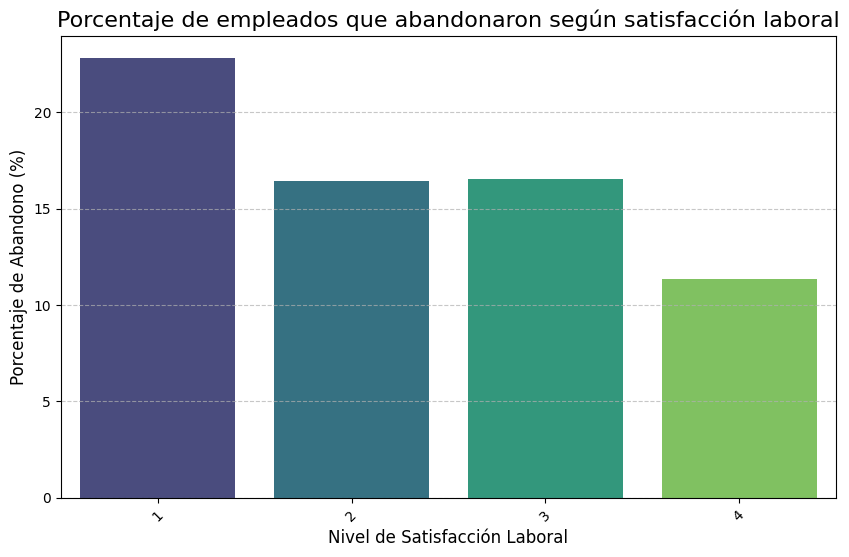

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por satisfacción laboral y calcular el porcentaje de empleados que dejaron la empresa
attrition_by_satisfaction = df.groupby("JobSatisfaction")["Attrition"].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_by_satisfaction.index, y=attrition_by_satisfaction["Yes"], palette="viridis")

# Personalizar el gráfico
plt.title("Porcentaje de empleados que abandonaron según satisfacción laboral", fontsize=16)
plt.xlabel("Nivel de Satisfacción Laboral", fontsize=12)
plt.ylabel("Porcentaje de Abandono (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()


Pareciere apuntar que un bajo Nivel de Satisfacción Laboral aumentaria el Porcentaje de Abandono, siendo una relación inversamente proporcional

#### Tasa de abandono vs Distancia al trabajo


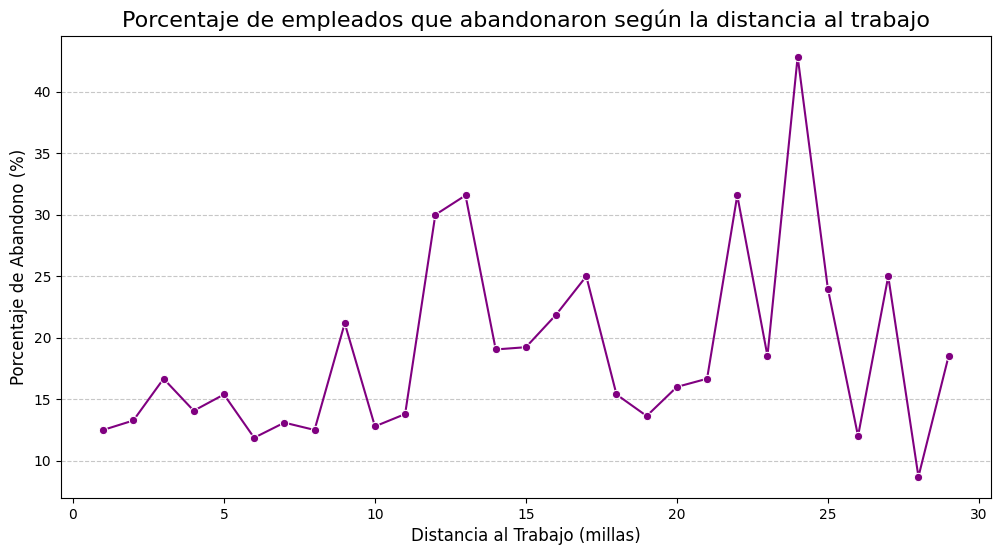

'#### Tasa de abandono vs Distancia al trabajo'

In [27]:
# Título para la segunda hipótesis
titulo_segunda_hipotesis = "#### Tasa de abandono vs Distancia al trabajo"

# Agrupar por distancia al trabajo y calcular el porcentaje de empleados que abandonaron
attrition_by_distance = df.groupby("DistanceFromHome")["Attrition"].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.lineplot(x=attrition_by_distance.index, y=attrition_by_distance["Yes"], marker="o", color="purple")

# Personalizar el gráfico
plt.title("Porcentaje de empleados que abandonaron según la distancia al trabajo", fontsize=16)
plt.xlabel("Distancia al Trabajo (millas)", fontsize=12)
plt.ylabel("Porcentaje de Abandono (%)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

# Devolver el título en formato markdown
titulo_segunda_hipotesis


La distancia pareceria ser un factor pero no queda claro si el más relevante, ya que si bien hay una tendencia a mayor abandono a más distancia, tambien quienes viven a 20 millas o más de 25 no presentan un porcentaje de abandono tan alto

#### Satisfacción laboral vs Equilibrio entre trabajo y vida personal


<ipython-input-28-e83ea9bafc56>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=satisfaction_by_worklife, x="WorkLifeBalance", y="JobSatisfaction", palette="coolwarm")


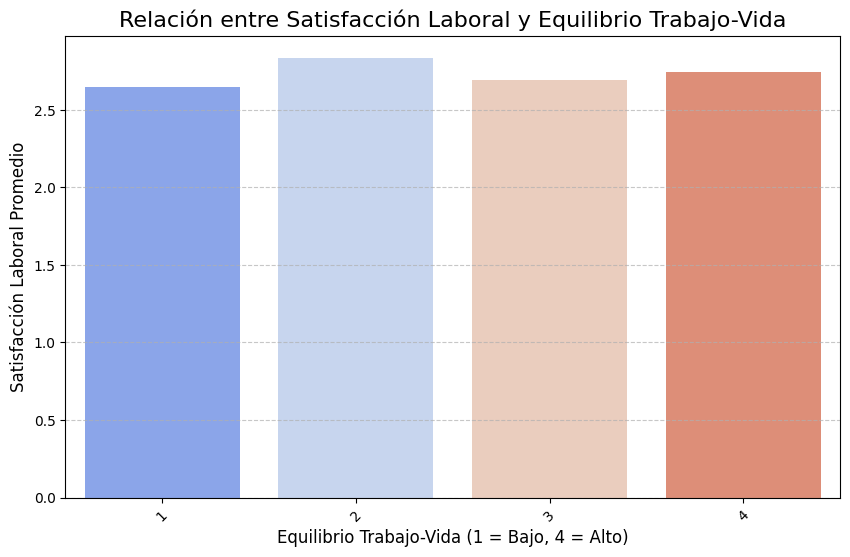

'#### Satisfacción laboral vs Equilibrio entre trabajo y vida personal'

In [28]:
# Título para la tercera hipótesis
titulo_tercera_hipotesis = "#### Satisfacción laboral vs Equilibrio entre trabajo y vida personal"

# Calcular el promedio de satisfacción laboral para cada nivel de equilibrio entre trabajo y vida personal
satisfaction_by_worklife = df.groupby("WorkLifeBalance")["JobSatisfaction"].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=satisfaction_by_worklife, x="WorkLifeBalance", y="JobSatisfaction", palette="coolwarm")

# Personalizar el gráfico
plt.title("Relación entre Satisfacción Laboral y Equilibrio Trabajo-Vida", fontsize=16)
plt.xlabel("Equilibrio Trabajo-Vida (1 = Bajo, 4 = Alto)", fontsize=12)
plt.ylabel("Satisfacción Laboral Promedio", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

# Devolver el título en formato markdown
titulo_tercera_hipotesis


A Nivel equilibrio entre trabajo y vida personal vs la Satisfacción laboral no parece haber una correlación clara. Inclusive personas con un equlibrio vida trabajo de 2 tienen mayor satisfacción. Se descarta relación entre Satisfacción y el Equilibrio Vida/Trabajo

#### Tasa de abandono vs Años trabajados en la empresa


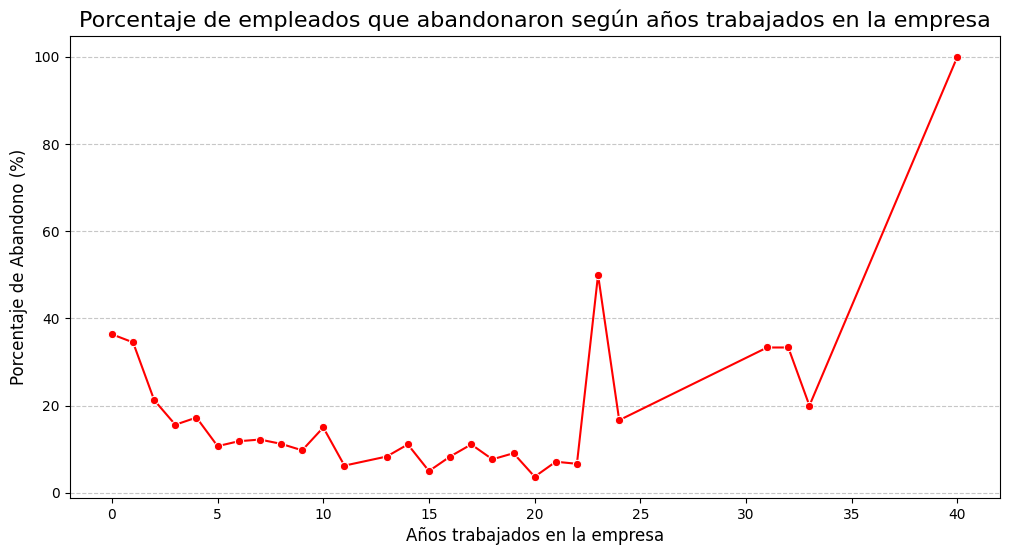

'#### Tasa de abandono vs Años trabajados en la empresa'

In [29]:
# Título para la nueva hipótesis
titulo_cuarta_hipotesis = "#### Tasa de abandono vs Años trabajados en la empresa"

# Agrupar por años trabajados y calcular el porcentaje de empleados que abandonaron
attrition_by_tenure = df.groupby("YearsAtCompany")["Attrition"].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x=attrition_by_tenure.index, y=attrition_by_tenure["Yes"], marker="o", color="red")

# Personalizar el gráfico
plt.title("Porcentaje de empleados que abandonaron según años trabajados en la empresa", fontsize=16)
plt.xlabel("Años trabajados en la empresa", fontsize=12)
plt.ylabel("Porcentaje de Abandono (%)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

# Devolver el título en formato markdown
titulo_cuarta_hipotesis


Por lo visto los Empleados con menos de 5 años en la empresa presentan una mayor tasa de abandono, pasado este tiempo la tasa baja teniendo picos cada 5 años hasta pasados los 20 años en la empresa. Luego de los 20 años la Tasa aumenta probablemente por factores como el retiro (jubilación)

## Preprocesamiento de Datos


**Preparación y Limpieza de Datos**

En esta sección, realizamos tareas de limpieza y preparación de datos para garantizar que estén listos para el análisis y la construcción de modelos.

- **Manejo de Valores Faltantes**: Verificar y tratar valores faltantes en las columnas relevantes.  
- **Codificación de Variables Categóricas**: Convertir variables categóricas en formato numérico (por ejemplo, one-hot encoding).  
- **Normalización/Estandarización**: Aplicar normalización o estandarización si es necesario.  
- **Selección de Características**: Identificar y seleccionar las variables más relevantes.  


### Nuevas columnas

In [32]:

#En esta sección, agregamos nuevas columnas derivadas de las variables existentes para enriquecer el análisis.

# Obtener el año actual
anio_actual = datetime.now().year

# Calcular los años desde la contratación (si la columna existe)
df["YearsSinceHire"] = anio_actual - df["HireDate"] if "HireDate" in df.columns else None

# Calcular los años en el rol actual
df["YearsInCurrentRole"] = df["YearsAtCompany"] - df["YearsSinceLastPromotion"]

# Eliminar columnas innecesarias si fueran redundantes
columnas_a_eliminar = ["HireDate"] if "HireDate" in df.columns else []
df = df.drop(columns=columnas_a_eliminar, errors="ignore")

# Mostrar información del DataFrame actualizado
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Outliers

In [38]:
import pandas as pd

# Función para calcular outliers usando el criterio IQR
def calcular_outliers_iqr(df):
    """
    Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame
    utilizando el criterio del rango intercuartílico (IQR), excluyendo variables binarias.

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame con columnas numéricas y su porcentaje de outliers,
                      ordenadas en orden decreciente.
    """
    resultados = []

    for columna in df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if df[columna].nunique() == 2:
            continue

        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

# Aplicar la función a nuestro DataFrame
outliers_detectados = calcular_outliers_iqr(df)

# Mostrar los resultados en Google Colab
display(outliers_detectados)  # Usa display() en lugar de ace_tools



,Columna,Porcentaje_Outliers
0,TrainingTimesLastYear,16.190476
1,MonthlyIncome,7.755102
2,YearsSinceLastPromotion,7.278912
3,YearsAtCompany,7.074830
4,StockOptionLevel,5.782313
5,TotalWorkingYears,4.285714
6,YearsInCurrentRole,3.809524
7,NumCompaniesWorked,3.537415
8,YearsWithCurrManager,0.952381


In [40]:
def plot_boxplot_outliers(df, columnas_outliers):
    """
    Genera un gráfico boxplot vertical de las variables con outliers,
    normalizando previamente los datos con RobustScaler.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        outlier_columns (list): Lista de columnas con outliers.

    Returns:
        None
    """
    # Normalizá las columnas con outliers
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[columnas_outliers] = scaler.fit_transform(df[columnas_outliers])

    # Configuración del gráfico
    plt.figure(figsize=(len(columnas_outliers) * 2, 10))
    sns.boxplot(data=df_normalized[columnas_outliers], orient='v')

    # Ajustes finales del gráfico
    plt.title('Boxplot de Variables con Outliers (Normalizadas)', fontsize=14)
    plt.ylabel('Valor Normalizado', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.tight_layout()
    plt.show()

In [42]:
outliers_df = calcular_outliers_iqr(df)

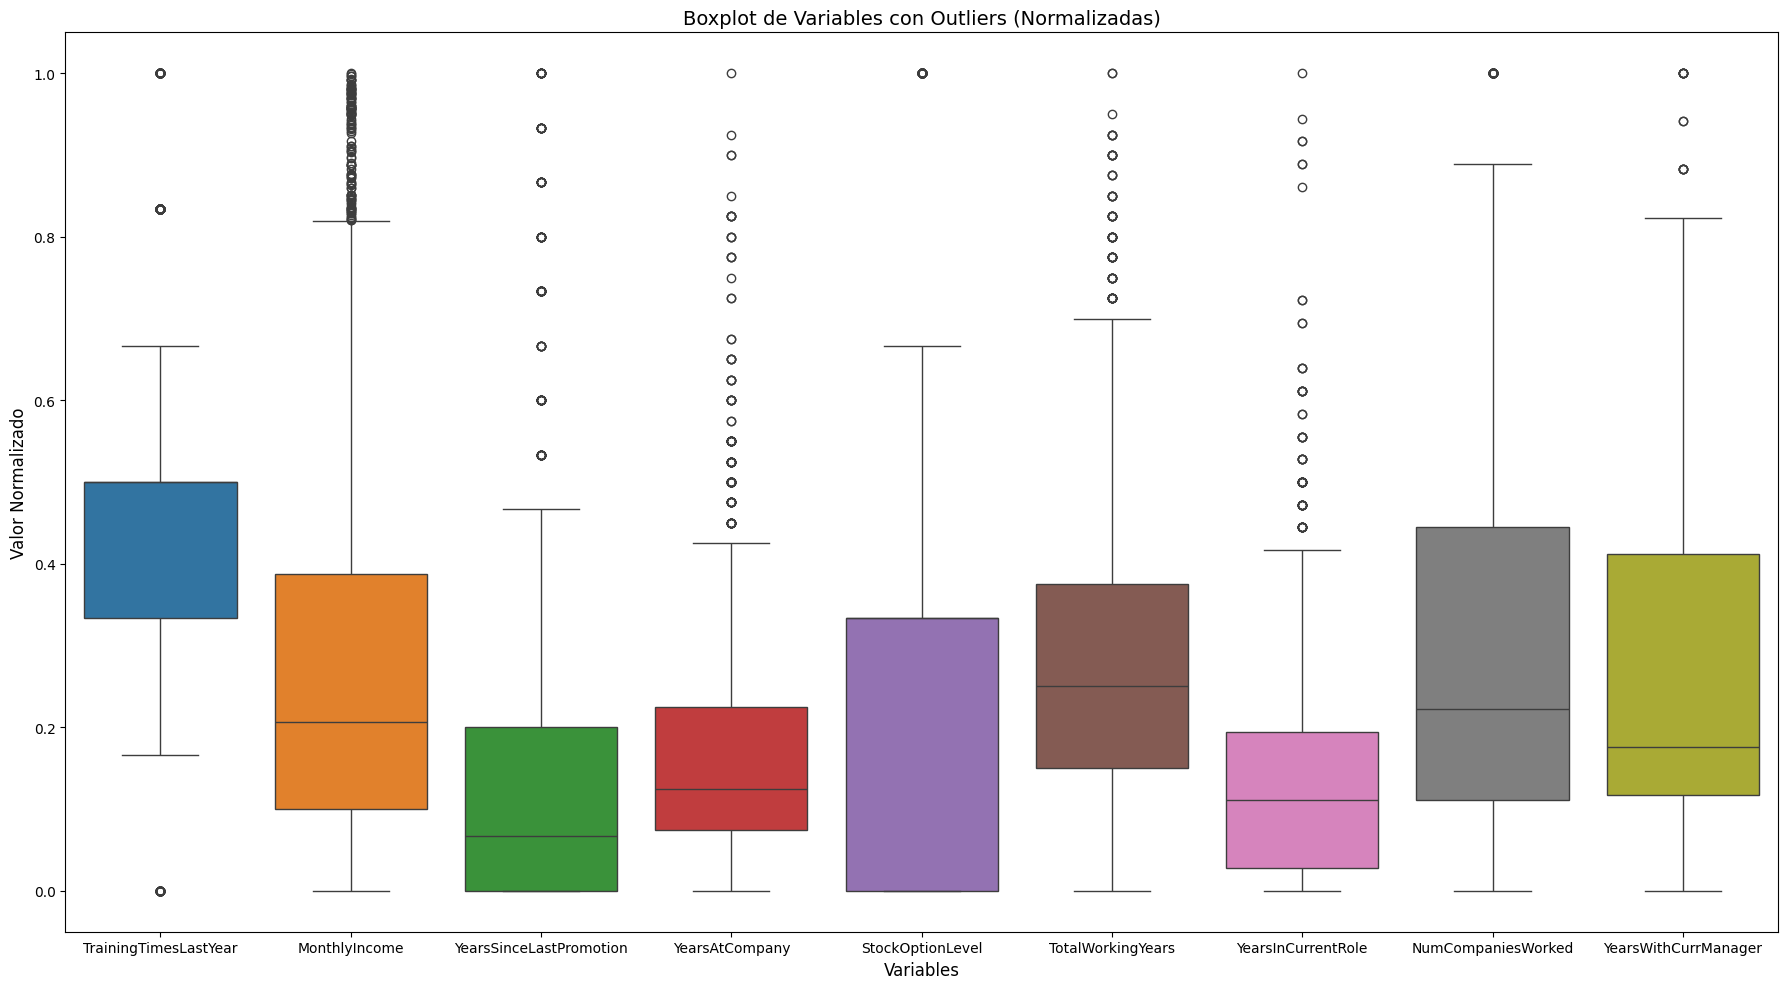

In [44]:
columnas_outliers = outliers_df['Columna'].tolist()
plot_boxplot_outliers(df, columnas_outliers)

### Conclusiones sobre el impacto de los outliers en el modelado

- **`TrainingTimesLastYear` (16.19%)**:  
  Un porcentaje alto de outliers sugiere que algunos empleados han recibido significativamente más o menos entrenamiento que la media. Esto podría ser un indicativo de empleados en posiciones críticas o con necesidades de formación inusuales.

- **`MonthlyIncome` (7.76%)**:  
  Un porcentaje considerable de outliers en el ingreso mensual puede reflejar diferencias salariales significativas entre empleados de distintos niveles jerárquicos. Esto puede afectar modelos de predicción si los valores extremos distorsionan la relación con otras variables.

- **`YearsSinceLastPromotion` (7.28%)**:  
  Un número alto de outliers indica que algunos empleados llevan muchos años sin promoción, lo que podría influir en la rotación. Esta variable puede ser clave en modelos que predicen la probabilidad de abandono.

- **`YearsAtCompany` (7.07%)**:  
  Tener una cantidad considerable de outliers en esta variable puede reflejar empleados con tiempos de permanencia inusuales. Esto puede influir en la relación con la variable de abandono (`Attrition`).

- **`StockOptionLevel` (5.78%)**:  
  La presencia de outliers en el nivel de opciones sobre acciones puede reflejar diferencias significativas en las compensaciones dentro de la empresa. Esto puede ser un factor importante para analizar el impacto de los incentivos en la retención de empleados.


### Valores nulos

In [50]:
# Definir la función para calcular el porcentaje de valores nulos
def calcular_porcentaje_nulos(df):
    """
    Calcula el porcentaje de valores nulos por columna y devuelve las columnas
    con valores nulos en orden decreciente según el porcentaje.

    Args:
    df (pd.DataFrame): DataFrame a analizar.

    Returns:
    pd.DataFrame: DataFrame con columnas `columna` y `porcentaje_nulos`.
    """
    # Calcular porcentaje de nulos
    porcentaje_nulos = df.isnull().mean() * 100

    # Filtrar columnas con nulos y ordenar en orden decreciente
    nulos_df = (porcentaje_nulos[porcentaje_nulos > 0]
                .sort_values(ascending=False)
                .reset_index())
    nulos_df.columns = ['columna', 'porcentaje_nulos']

    return nulos_df

# Verificar si hay valores nulos en el dataset
nulos_detectados = calcular_porcentaje_nulos(df)

# Evaluar si es necesario imputar valores nulos
if nulos_detectados.empty:
    comentario_nulos = "En este caso no es necesario imputar ninguna columna con valores nulos."
else:
    comentario_nulos = "Se han detectado columnas con valores nulos. Se recomienda aplicar técnicas de imputación adecuadas."

# Mostrar el comentario correspondiente
comentario_nulos


'Se han detectado columnas con valores nulos. Se recomienda aplicar técnicas de imputación adecuadas.'

In [51]:
calcular_porcentaje_nulos(df)

,columna,porcentaje_nulos
0,YearsSinceHire,100.0


In [49]:
def imputar_valores_nulos(data, columnas_outliers):
    """
    Imputa los valores nulos en el DataFrame según las reglas especificadas:
    - Para las variables numéricas:
        - Si no tiene outliers, se imputa con la media.
        - Si tiene outliers, se imputa con la mediana.
    - Para las variables categóricas, se imputa con la moda.

    Parámetros:
        data (pd.DataFrame): El DataFrame de entrada con los valores nulos.
        columnas_outliers (list): Lista con los nombres de las columnas con outliers.

    Devuelve:
        pd.DataFrame: El DataFrame con los valores nulos imputados.
    """
    for col in data.columns:
        if data[col].dtype == 'object':  # Categóricas
            # Imputar con la moda para columnas categóricas
            moda = data[col].mode()[0]
            data[col] = data[col].fillna(moda)

        else:  # Numéricas
            if col in columnas_outliers:
                # Imputar con la mediana si la columna tiene outliers
                mediana = data[col].median()
                data[col] = data[col].fillna(mediana)
            else:
                # Imputar con la media si la columna no tiene outliers
                media = data[col].mean()
                data[col] = data[col].fillna(media)

    return data

Se han detectado columnas con valores nulos. Se iputan datos


### Eliminamos columnas irrelevantes

In [52]:
def eliminar_columnas_irrelevantes(data):
    """
    Elimina columnas irrelevantes del DataFrame.
    - Elimina columnas con un solo valor.
    - Elimina columnas específicas como 'id' y 'year'.

    Parámetros:
        data (pd.DataFrame): El DataFrame que contiene las variables a procesar.

    Devuelve:
        pd.DataFrame: El DataFrame con las columnas irrelevantes eliminadas.
    """
    # Eliminar columnas con un solo valor
    columnas_a_eliminar = [col for col in data.columns if len(data[col].unique()) == 1]

    # Eliminamos las columnas del DataFrame
    data = data.drop(columns=columnas_a_eliminar, axis=1)

    return data

In [53]:
# Mostrar el número de valores únicos de cada columna
print(df.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [54]:
df= eliminar_columnas_irrelevantes(df)

### Encoding y normalizado

In [55]:
def preprocesar_data(data):
    """
    Función para preprocesar los datos.
    - Realiza One Hot Encoding en variables categóricas con <= 8 categorías.
    - Realiza Label Encoding en variables categóricas con > 8 categorías.
    - Normaliza las variables numéricas entre 0 y 1.
    """
    # Inicializamos los transformadores
    onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # Cambié sparse a sparse_output
    label_encoder = LabelEncoder()
    scaler = MinMaxScaler()

    # Variables categóricas y numéricas
    categorias = data.select_dtypes(include=['object']).columns
    numericas = data.select_dtypes(exclude=['object']).columns

    # Aplicamos One Hot Encoding o Label Encoding según corresponda
    for col in categorias:
        if data[col].nunique() <= 8:
            encoded = onehot_encoder.fit_transform(data[[col]])
            encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out([col]))
            data = pd.concat([data, encoded_df], axis=1)
            data.drop(columns=[col], inplace=True)
        else:
            data[col] = label_encoder.fit_transform(data[col])

    # Normalizamos las variables numéricas
    # Inicializar los escaladores
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    # Iterar sobre las columnas numéricas y aplicar el escalado apropiado
    for col in numericas:
        # Calcular skewness de la columna
        skewness = skew(df[col].dropna())  # Ignorar valores NaN si los hay

        # Escalar dependiendo del skewness
        if abs(skewness) > 1:
            # Si el skewness es alto, usamos MinMaxScaler
            data[col] = minmax_scaler.fit_transform(data[[col]])
        else:
            # Si el skewness es bajo, usamos StandardScaler
            data[col] = standard_scaler.fit_transform(data[[col]])

    return data

In [56]:
df = preprocesar_data(df)

In [57]:
df.head(10)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-1.701283,-0.660531,1.383138,0.379672,0.25,7,1.153254,0.262454,0.726020,0.888889,-1.150554,0.0,-1.584178,-0.932014,0.200,-2.171982,-2.493820,0.150,0.166667,0.000000,0.245834,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.322365,-1.297775,-0.147150,-1.868426,-1.699621,0.254625,-0.240677,-1.026167,0.25,6,-0.660853,0.217009,1.488876,0.111111,2.129306,1.0,1.191438,0.241988,0.250,0.155707,0.338096,0.250,0.250000,0.066667,0.806541,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.008343,1.414363,-0.887515,-0.891688,-1.696298,1.169781,1.284725,-1.026167,0.00,2,0.246200,0.056925,-1.674841,0.666667,-0.057267,0.0,-0.658973,-0.932014,0.175,0.155707,0.338096,0.000,0.000000,0.000000,-1.155935,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,-0.429664,1.461466,-0.764121,1.061787,-1.694636,1.169781,-0.486709,0.379672,0.00,6,0.246200,0.100053,1.243211,0.111111,-1.150554,0.0,0.266233,-0.932014,0.200,0.155707,0.338096,0.200,0.138889,0.200000,-1.155935,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.691313,-1.575686,-1.274014,0.379672,0.00,2,-0.660853,0.129489,0.325900,1.000000,-0.877232,0.0,1.191438,0.241988,0.150,0.155707,0.338096,0.050,0.000000,0.133333,-0.595227,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
5,-0.539166,0.502054,-0.887515,-0.891688,-1.689652,1.169781,0.645041,0.379672,0.00,2,1.153254,0.108425,-0.344199,0.000000,-0.603911,0.0,0.266233,-0.932014,0.200,-0.620189,-1.077862,0.175,0.111111,0.200000,0.526188,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,2.417384,1.292887,-0.764121,0.085049,-1.686328,0.254625,0.743454,1.785511,0.00,2,-1.567907,0.087467,-0.611227,0.444444,1.309341,1.0,-1.584178,2.589994,0.300,0.155707,-1.077862,0.025,0.027778,0.000000,-1.155935,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,-0.758170,1.377177,1.827158,-1.868426,-1.684667,1.169781,0.054562,0.379672,0.00,2,0.246200,0.088678,-0.137464,0.111111,1.855984,1.0,-0.658973,0.241988,0.025,-0.620189,0.338096,0.025,0.027778,0.000000,-1.155935,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.117845,-1.453958,1.703764,0.085049,-1.683005,1.169781,-1.077188,-1.026167,0.50,4,0.246200,0.448499,-0.776644,0.000000,1.582663,1.0,-0.658973,-0.932014,0.250,-0.620189,0.338096,0.225,0.222222,0.066667,1.086895,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,-0.101159,1.230910,2.197341,0.085049,-1.681343,0.254625,1.383138,0.379672,0.25,0,0.246200,0.222643,0.318170,0.666667,-0.603911,0.0,-0.658973,1.415991,0.425,0.155707,-1.077862,0.175,0.000000,0.466667,0.806541,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


## Construcción de Modelos

## Construcción de Modelos de Clasificación  

En esta sección, construimos modelos de clasificación para predecir la rotación de empleados (`Attrition`) utilizando el conjunto de datos preparado.  

- **Selección de Algoritmos**: Se explorarán modelos de clasificación como **Regresión Logística, Random Forest y SVM** para identificar cuál ofrece el mejor desempeño.  
- **Entrenamiento de Modelos**: Entrenaremos los modelos utilizando el conjunto de entrenamiento (`X_train`, `y_train`).  
- **Ajuste de Hiperparámetros**: Aplicaremos técnicas de ajuste de hiperparámetros para optimizar el rendimiento de los modelos y mejorar la capacidad de predicción.  


In [62]:
from sklearn.model_selection import train_test_split

# Definir la semilla para reproducibilidad
semilla = 142857

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['Attrition_Yes'])  # Excluir la variable objetivo
y = df['Attrition_Yes']  # Variable objetivo

# Dividir el dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

# Verificar el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")


Tamaño de X_train: (1029, 38)
Tamaño de X_test: (441, 38)
Tamaño de y_train: (1029,)
Tamaño de y_test: (441,)


In [64]:
# Creo DataFrame para almacenar los resultados de los modelos de clasificación
column_names = ["Modelo", "Accuracy", "Precision", "Recall", "F1-score", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)

# Mostrar el DataFrame vacío
print(resultados_df)


Empty DataFrame
Columns: [Modelo, Accuracy, Precision, Recall, F1-score, Tiempo]
Index: []


In [66]:
# Función para guardar los resultados de los modelos de clasificación
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):
    # Importar métricas de evaluación para clasificación
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    import pandas as pd

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-score': [f1],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    return resultados_df


In [70]:
def plot_confusion_matrix(y_test, y_pred):
    """
    Genera una matriz de confusión para evaluar el desempeño del modelo de clasificación.

    Args:
        y_test (array-like): Valores reales de la variable objetivo.
        y_pred (array-like): Valores predichos por el modelo.
    """
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Crear el heatmap con seaborn
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No Abandona", "Abandona"], yticklabels=["No Abandona", "Abandona"])

    # Añadir títulos y etiquetas
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.title("Matriz de Confusión")

    # Mostrar el gráfico
    plt.show()


In [72]:
import time
import numpy as np
from sklearn.base import clone

# Función para entrenar el modelo, guardar métricas y mostrar la matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):
    """
    Entrena un modelo de clasificación, guarda las métricas y muestra la matriz de confusión.

    Args:
        modelo: Modelo de clasificación a entrenar.
        nombre_modelo (str): Nombre del modelo.
        X_train (pd.DataFrame): Conjunto de entrenamiento.
        y_train (pd.Series): Etiquetas del conjunto de entrenamiento.
        X_test (pd.DataFrame): Conjunto de prueba.
        y_test (pd.Series): Etiquetas del conjunto de prueba.
        tf (bool): Indica si el modelo es de TensorFlow (requiere manejo especial de predicciones).
    """

    # Copia del modelo para evitar sobreescribir
    modelo = clone(modelo)

    # Entrenar el modelo y medir el tiempo de ejecución
    start = time.time()
    modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Hacer predicciones
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardar los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostrar los resultados de este modelo
    print(f"Resultados para el modelo: {nombre_modelo}")
    print(resultados, "\n")

    # Mostrar la matriz de confusión para evaluar el modelo
    plot_confusion_matrix(y_test, y_pred)


#### Regresión Logística

Resultados para el modelo: Regresión Logística
                Modelo  Accuracy  Precision   Recall  F1-score   Tiempo
0  Regresión Logística  0.868481   0.578947  0.34375  0.431373  0.09152 



<ipython-input-72-606637e9ff90>:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)


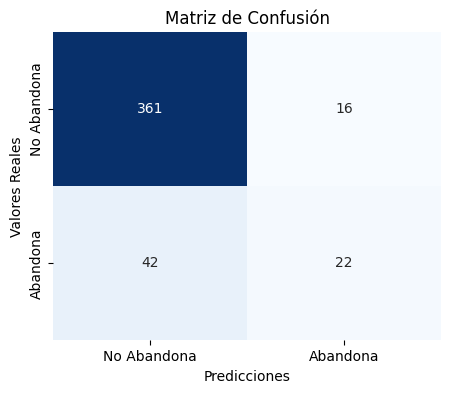

In [73]:
from sklearn.linear_model import LogisticRegression

# Definir el modelo de clasificación
modelo = LogisticRegression(random_state=semilla)

# Entrenar el modelo y evaluar su desempeño
entrenar_modelo(modelo, "Regresión Logística", X_train, y_train, X_test, y_test)


#### Árbol de Decisión para Clasificación


Resultados para el modelo: Árbol de Decisión
              Modelo  Accuracy  Precision    Recall  F1-score    Tiempo
0  Árbol de Decisión  0.814059   0.339286  0.296875  0.316667  0.025788 



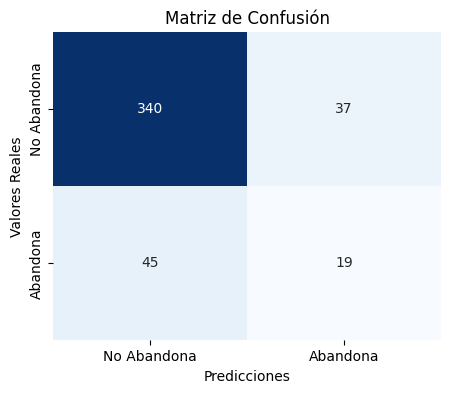

In [74]:
from sklearn.tree import DecisionTreeClassifier

# Definir el modelo de árbol de decisión para clasificación
modelo = DecisionTreeClassifier(
    criterion='gini',  # Usa 'gini' o 'entropy' para la división
    max_depth=5,  # Controla la profundidad del árbol
    random_state=semilla  # Semilla para reproducibilidad
)

# Entrenar el modelo y evaluar su desempeño
entrenar_modelo(modelo, "Árbol de Decisión", X_train, y_train, X_test, y_test)


#### Random Forest Classifier

Resultados para el modelo: Random Forest
          Modelo  Accuracy  Precision    Recall  F1-score    Tiempo
0  Random Forest  0.873016   0.722222  0.203125  0.317073  0.491701 



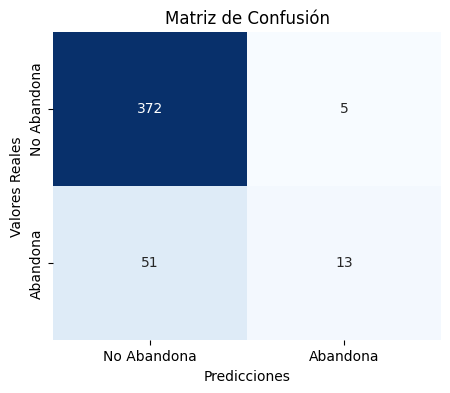

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest para clasificación
modelo = RandomForestClassifier(
    n_estimators=100,  # Número de árboles en el bosque
    max_depth=10,  # Profundidad máxima de los árboles
    random_state=semilla  # Semilla para reproducibilidad
)

# Entrenar el modelo y evaluar su desempeño
entrenar_modelo(modelo, "Random Forest", X_train, y_train, X_test, y_test)


#### Radient Boosting Classifier

Resultados para el modelo: Gradient Boosting
              Modelo  Accuracy  Precision    Recall  F1-score    Tiempo
0  Gradient Boosting  0.879819   0.657143  0.359375  0.464646  0.874491 



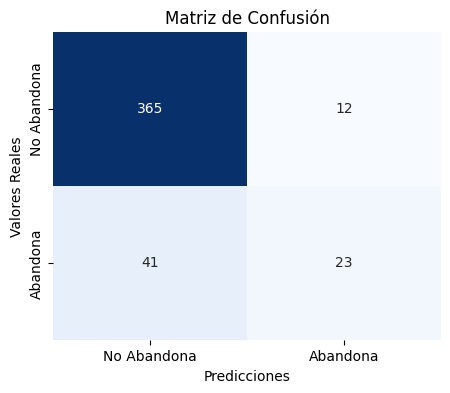

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

# Definir el modelo de Gradient Boosting para clasificación
modelo = GradientBoostingClassifier(
    n_estimators=100,  # Número de árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=3,  # Profundidad máxima de los árboles
    random_state=semilla  # Semilla para reproducibilidad
)

# Entrenar el modelo y evaluar su desempeño
entrenar_modelo(modelo, "Gradient Boosting", X_train, y_train, X_test, y_test)


Prueba eliminando los outliers de `TrainingTimesLastYear` para evaluar si afectan el rendimiento del modelo.  

Esta variable presentó el mayor porcentaje de valores extremos en nuestro análisis previo, por lo que su eliminación podría mejorar la estabilidad del modelo y reducir el impacto de valores atípicos en la clasificación de empleados que abandonan la empresa.  


In [78]:
# Seleccionar la variable con más outliers para eliminarlos
columna_outlier = "TrainingTimesLastYear"  # Puedes cambiarla según el análisis

# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df[columna_outlier].quantile(0.25)
Q3 = df[columna_outlier].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos eliminando los outliers
df_cleaned = df[(df[columna_outlier] >= lower_bound) & (df[columna_outlier] <= upper_bound)]

# Mostrar la cantidad de registros antes y después de eliminar los outliers
print(f"Registros antes de eliminar outliers: {len(df)}")
print(f"Registros después de eliminar outliers: {len(df_cleaned)}")


Registros antes de eliminar outliers: 1470
Registros después de eliminar outliers: 1232


In [80]:
# X será todo menos la columna 'Attrition_Yes' (la target)
X = df_cleaned.drop(columns=['Attrition_Yes'])

# y será la columna 'Attrition_Yes' (la target)
y = df_cleaned['Attrition_Yes']

# Realizamos el split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")


Tamaño de X_train: (862, 38)
Tamaño de X_test: (370, 38)
Tamaño de y_train: (862,)
Tamaño de y_test: (370,)


Resultados para el modelo: Gradient Boosting - sin outliers
                             Modelo  Accuracy  Precision    Recall  F1-score  \
0  Gradient Boosting - sin outliers  0.848649   0.708333  0.257576  0.377778   

     Tiempo  
0  1.345186   



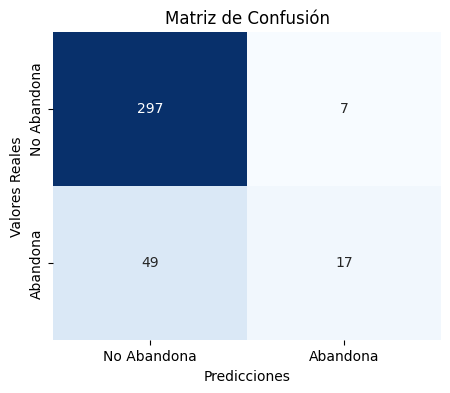

In [81]:
# Entrenar el modelo Gradient Boosting con el dataset sin outliers
entrenar_modelo(modelo, "Gradient Boosting - sin outliers", X_train, y_train, X_test, y_test)


## Conclusiones  

*En esta sección, resumimos los resultados y conclusiones clave del proyecto.*  

- **Resumen de Resultados**:  
  - Se probaron varios modelos de clasificación, incluyendo **Regresión Logística, Árbol de Decisión, Random Forest y Gradient Boosting**.  
  - Se compararon los resultados antes y después de eliminar los outliers en variables clave.  
  - Se analizaron las métricas de **Accuracy, Precision, Recall y F1-score** para evaluar el desempeño de los modelos.  

- **Cumplimiento del Objetivo**:  
  - El objetivo era **predecir la rotación de empleados (`Attrition`)** con base en variables como satisfacción laboral, equilibrio trabajo-vida y antigüedad en la empresa.  
  - Se identificaron factores clave que influyen en la rotación, lo que puede ayudar a la empresa a tomar mejores decisiones para la retención de talento.  


In [82]:
resultados_df

,Modelo,Accuracy,Precision,Recall,F1-score,Tiempo
0,Regresión Logística,0.868481,0.578947,0.343750,0.431373,0.091520
1,Árbol de Decisión,0.814059,0.339286,0.296875,0.316667,0.025788
2,Random Forest,0.873016,0.722222,0.203125,0.317073,0.491701
3,Gradient Boosting,0.879819,0.657143,0.359375,0.464646,0.874491
4,Gradient Boosting - sin outliers,0.848649,0.708333,0.257576,0.377778,1.345186


### Resumen  

- **Regresión Logística**:  
  Presenta un **accuracy del 86.8%**, con una **precisión de 57.8%** y un **recall de 34.4%**. Esto indica que aunque clasifica correctamente en general, tiene dificultades para identificar correctamente los casos positivos (`Attrition`). Su tiempo de ejecución es el más rápido (**0.0915 segundos**), lo que la hace una opción eficiente.  

- **Árbol de Decisión**:  
  Tiene un desempeño inferior con un **accuracy del 81.4%** y un **F1-score de 31.7%**, lo que sugiere que el modelo puede estar sobreajustándose o no capturando bien las relaciones en los datos. Su tiempo de ejecución es muy bajo (**0.0258 segundos**), pero su capacidad predictiva es menor en comparación con otros modelos.  

- **Random Forest**:  
  Es uno de los modelos más precisos con un **accuracy del 87.3%**, aunque su **recall del 20.3%** indica que tiene dificultades para capturar correctamente los empleados que abandonan la empresa. Su tiempo de ejecución (**0.4917 segundos**) es mayor que el de los modelos más simples, pero sigue siendo aceptable.  

- **Gradient Boosting**:  
  Ofrece el mejor **accuracy (87.9%)** y un **F1-score de 46.5%**, lo que indica que logra un mejor equilibrio entre precisión y recall. Sin embargo, tiene el mayor tiempo de ejecución entre los modelos sin limpieza de datos (**0.8745 segundos**), lo que puede ser un factor a considerar en términos de eficiencia.  

- **Gradient Boosting - sin outliers**:  
  Después de eliminar los outliers, el modelo redujo su **accuracy a 84.8%**, lo que sugiere que los outliers contenían información relevante para la clasificación. También muestra una **reducción en recall (25.8%) y F1-score (37.8%)**, mientras que su tiempo de ejecución aumentó significativamente (**1.3452 segundos**).  

### Conclusión:  
El **Gradient Boosting con outliers** es el modelo que ofrece el mejor desempeño general, logrando un **buen equilibrio entre precisión y recall**, aunque con un mayor tiempo de entrenamiento. La eliminación de outliers no mejoró el rendimiento, lo que sugiere que estos valores extremos contenían información valiosa.  


### Eliminación de outliers  

Al eliminar los outliers de la variable `TrainingTimesLastYear`, se observa una **disminución en el rendimiento del modelo de Gradient Boosting**.  

El **accuracy** del modelo baja de **87.9%** a **84.8%**, lo que sugiere que los outliers contenían información valiosa para la predicción de la rotación de empleados. Además, el **recall** disminuye de **35.9%** a **25.8%**, lo que significa que el modelo es menos capaz de identificar correctamente los empleados que abandonan la empresa.  

El **F1-score** también cae de **46.5%** a **37.8%**, lo que indica que el modelo sin outliers tiene un peor equilibrio entre precisión y recall.  

Por otro lado, el **tiempo de ejecución aumenta de 0.8745 segundos a 1.3452 segundos**, lo que sugiere que eliminar outliers puede haber aumentado la complejidad del modelo en lugar de mejorar su eficiencia.  

### Conclusión:  
La eliminación de outliers en este caso **no mejoró el desempeño del modelo**. Esto sugiere que los valores extremos en `TrainingTimesLastYear` podrían estar capturando información relevante sobre la rotación de empleados y no necesariamente son errores en los datos. 🚀  


### Recomendaciones y Pasos a Seguir  

1. **Optimización de Gradient Boosting**:  
   - Dado que fue el modelo con mejor desempeño, se recomienda ajustar sus hiperparámetros (**número de árboles, tasa de aprendizaje, profundidad máxima, etc.**) para mejorar la precisión y optimizar el tiempo de ejecución.  

2. **Exploración de Modelos Adicionales**:  
   - Evaluar otros algoritmos como **XGBoost o LightGBM**, que pueden ofrecer un mejor balance entre desempeño y tiempo de ejecución.  

3. **Preprocesamiento de Datos**:  
   - Analizar si la transformación de variables (escalado, normalización, etc.) o la creación de nuevas características puede mejorar los resultados.  
   - Explorar la ingeniería de características para incluir interacciones entre variables que puedan influir en la rotación de empleados.  

4. **Validación Cruzada**:  
   - Implementar **validación cruzada** para obtener una evaluación más robusta de los modelos y minimizar el riesgo de sobreajuste.  

5. **Análisis de Importancia de Variables**:  
   - Identificar las variables más relevantes para los modelos, lo que puede guiar esfuerzos adicionales en el preprocesamiento o en la recolección de datos.  
   - Evaluar la contribución de variables como **satisfacción laboral, distancia al trabajo y equilibrio entre trabajo y vida personal**.  

6. **Reducción de Tiempo de Ejecución**:  
   - En caso de requerir menor tiempo de ejecución, se podrían explorar técnicas de reducción de dimensionalidad (**PCA, selección de características**) o simplificación del conjunto de datos.  

7. **Implementación y Monitoreo**:  
   - Una vez seleccionado y optimizado el modelo, proceder con su implementación y establecer un sistema de **monitoreo** para garantizar su desempeño en producción.  
   - Analizar si el modelo necesita actualizaciones periódicas a medida que cambian los datos y las condiciones en la empresa.  
